# Locker Problem
There are 100 closed lockers and 100 students. The first student opens every locker. The second student goes to every second locker and closes it. The third student goes to every third locker and closes it if it's open, and opens it if it's closed. The fourth student goes to every fourth locker and changes its state (opens or closes it).

This pattern continues until all of the students have gone through. How many lockers are left open? Which lockers are left open?

In [1]:
number_of_lockers = 100
lockers = [False] * number_of_lockers # False is closed, True is open

for student_number in range(1,number_of_lockers+1):
    for locker_number in range(0,number_of_lockers):
        if (locker_number+1) % student_number == 0: # if the locker number is exactly divisible by student number
            lockers[locker_number] = not lockers[locker_number] # flip 0 to 1 and vice versa

import pandas as pd
df = pd.DataFrame({'Open':lockers})
df.index += 1 # so the numbering starts from 1, not 0
df

,Open
1,True
2,False
3,False
4,True
5,False
...,...
96,False
97,False
98,False
99,False


To check which lockers are left open, we can filter the dataframe.

In [2]:
openLockers = df[df['Open'] == True]
openLockers

,Open
1,True
4,True
9,True
16,True
25,True
36,True
49,True
64,True
81,True
100,True


We can also look at how many lockers are left open as a function of the total number of lockers.

Running this next cell will take a minute or two.

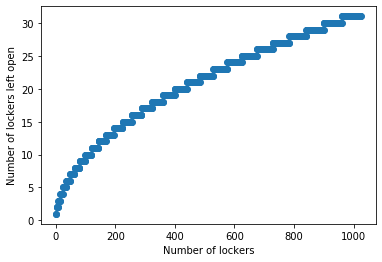

In [3]:
def countOpenLockers(numberOfLockers):
    lockers = []
    for i in range(0,numberOfLockers): # lockers numbered from 0 to 99
        lockers.append(False) # False is closed, True is open
    for studentNumber in range(1,numberOfLockers+1):
        for lockerNumber in range(0,numberOfLockers):
            if (lockerNumber+1) % studentNumber == 0: # if the locker number is exactly divisible by student number
                lockers[lockerNumber] = not lockers[lockerNumber] # flip 0 to 1 and vice versa
    return lockers.count(True)

x = list(range(2,1024))
y = []
for value in x:
    y.append(countOpenLockers(value))

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
plt.xlabel('Number of lockers')
plt.ylabel('Number of lockers left open')
plt.show()

## Questions to think about

1. What pattern do you see in the open lockers?
2. Why do you think that pattern occurs?
3. What happens to the pattern as the number of lockers (and students) increases?

## Visual Simulation

We can use `matplotlib.animation` to animate a bar graph of lockers opening and closing.

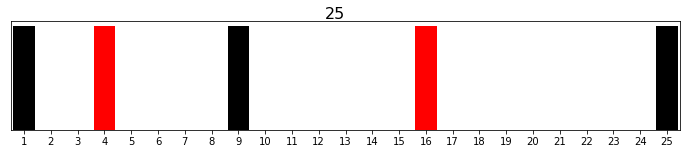

In [4]:
number_of_lockers = 25
locker_color = ['black', 'red'] # list as many colors as you'd like

from numpy import arange
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure(figsize=(12,2))
ax = fig.add_subplot(1,1,1)

lockers = [False] * number_of_lockers
x = arange(1, number_of_lockers+1)

def init():
    pass

def animate(student_number):
    for locker_number in range(number_of_lockers):
        if (locker_number+1) % (student_number+1) == 0: # +! for each because of 0-based numbering
            lockers[locker_number] = not lockers[locker_number]
    ax.clear()
    ax.set_xlim(0.5, number_of_lockers+.5) # set the range to display just the "lockers"
    ax.set_xticks(x) # label every tick using the arange from earlier
    ax.set_yticks([]) # disable y-axis labels
    fig.suptitle(student_number+1, fontsize=16)#.xlim(left=1)
    ax.bar(x, lockers, color=locker_color)
    return 

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=number_of_lockers, interval=300, repeat=False)
HTML(ani.to_jshtml())